#MultinomiaNB 다중분류

In [ ]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, x_test.shape)

(25000,) (25000,)


#IMDB 데이터를 텍스트로 변환

In [ ]:
import pandas as pd
word_to_index = imdb.get_word_index()
index_to_word ={}
for key, value in word_to_index.items():
  index_to_word[value + 3] = key
for index, token in enumerate(('<pad>', '<sos>','<unk>')):
  index_to_word[index] = token

train_reviews = []

for x in x_train:
  tmp = ' '.join([index_to_word[index] for index in x])
  train_reviews.append(tmp)

test_reviews = []

for x in x_test:
  tmp = ' '.join([index_to_word[index] for index in x])
  test_reviews.append(tmp)

train = pd.concat([pd.DataFrame(train_reviews),pd.DataFrame(y_train)], axis =1)
train.columns = ['reviews', 'label']
train['reviews'] = train['reviews'].str[6:]

test = pd.concat([pd.DataFrame(test_reviews),pd.DataFrame(y_test)], axis =1)
test.columns = ['reviews', 'label']
train['reviews'] = train['reviews'].str[6:]


print('<<<<<<<<<<<<<<<train Dataset for MNB >>>>>>>>>>>>>>>>>',train)
print('<<<<<<<<<<<<<<<train Dataset for MNB >>>>>>>>>>>>>>>>>',test)

<<<<<<<<<<<<<<<train Dataset for MNB >>>>>>>>>>>>>>>>>                                                  reviews  label
0      ilm was just brilliant casting location scener...      1
1      ir big boobs bad music and a giant safety pin ...      0
2      as to be one of the worst films of the 1990s w...      0
3      ots excel at storytelling the traditional sort...      1
4      mistake of my life br br i picked this movie u...      0
...                                                  ...    ...
24995  s a racist movie but worthy of study and enjoy...      1
24996  ugosi plays a doctor who will do anything to k...      0
24997  ar away galaxy is a planet called ceta it's na...      0
24998  grees had me hooked i looked forward to it com...      1
24999  ig fan of the original film it's hard to watch...      0

[25000 rows x 2 columns]
<<<<<<<<<<<<<<<train Dataset for MNB >>>>>>>>>>>>>>>>>                                                  reviews  label
0      <sos> please give this on

In [ ]:
x_train, x_test = train['reviews'].values, test['reviews'].values
y_train, y_test = train['label'].values, test['label'].values
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary = False)
x_traincv = cv.fit_transform(x_train)
x_traincv.shape


(25000, 76521)

In [ ]:
print(cv.inverse_transform(x_traincv)[0])

['ilm' 'was' 'just' 'brilliant' 'casting' 'location' 'scenery' 'story'
 'direction' 'everyone' 'really' 'suited' 'the' 'part' 'they' 'played'
 'and' 'you' 'could' 'imagine' 'being' 'there' 'robert' 'redford' 'is'
 'an' 'amazing' 'actor' 'now' 'same' 'director' 'norman' 'father' 'came'
 'from' 'scottish' 'island' 'as' 'myself' 'so' 'loved' 'fact' 'real'
 'connection' 'with' 'this' 'film' 'witty' 'remarks' 'throughout' 'were'
 'great' 'it' 'much' 'that' 'bought' 'soon' 'released' 'for' 'retail'
 'would' 'recommend' 'to' 'watch' 'fly' 'fishing' 'cried' 'at' 'end' 'sad'
 'know' 'what' 'say' 'if' 'cry' 'must' 'have' 'been' 'good' 'definitely'
 'also' 'congratulations' 'two' 'little' 'boy' 'of' 'paul' 'children'
 'are' 'often' 'left' 'out' 'praising' 'list' 'think' 'because' 'stars'
 'play' 'them' 'all' 'grown' 'up' 'such' 'big' 'profile' 'whole' 'but'
 'these' 'should' 'be' 'praised' 'done' 'don' 'lovely' 'true' 'someone'
 'life' 'after' 'shared' 'us']


In [ ]:
print(cv.get_feature_names_out()[-10:])

['était' 'état' 'étc' 'évery' 'êxtase' 'ís' 'ísnt' 'østbye' 'über'
 'üvegtigris']


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_traincv, y_train)

MultinomialNB()

In [ ]:
print('Accuracy_score: {}'.format(mnb.score(x_testcv, y_test)))

Accuracy_score: 0.81932


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
x_testcv = cv.transform(x_test)
pred = mnb.predict(x_testcv)

acc = accuracy_score(y_test, pred)
print('Accuracy_score {}'.format(acc))

Accuracy_score 0.81932


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     12500
           1       0.85      0.77      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



#ROC 곡선은 모델이 어떻게 다양한 임계값에서 반응하는지를 보여줌. 이는 주로 진짜 양성 비율(TPR, 재현율과 동일)과 거짓 양성 비율(FPR)에 초점을 맞춤.
#ROC 곡선과 AUC는 모델의 전체적인 성능을 평가하는 데 사용되며, 특히 불균형한 데이터셋에서 유용함.AUC 값은 민감도와 특이도의 조화 평균

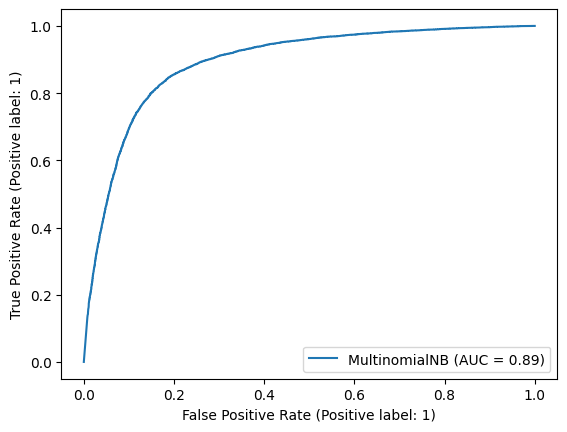

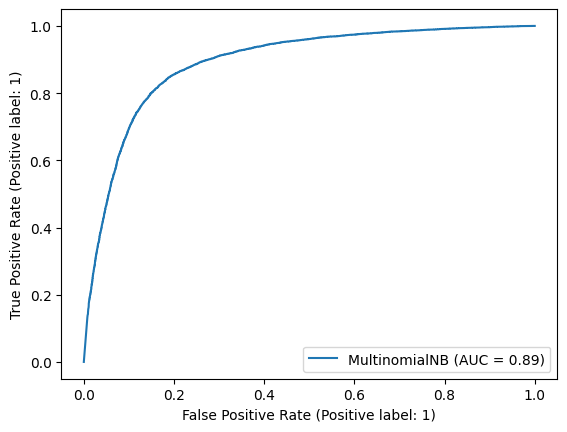

In [ ]:
from sklearn.metrics import RocCurveDisplay

roc_dis = RocCurveDisplay.from_estimator(mnb, x_testcv, y_test) # (mnb, x_testcv, y_test) <---> 주의 (y_test, pred)
roc_dis.plot()
plt.show()